<a href="https://colab.research.google.com/github/annanya-mathur/Development-Over-Tensorflow/blob/main/3D_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphs in Tensorflow**
>**Any operation in tensorflow is performed over Graph. Graphs are used to evalute variables over operations to get a specific value.**
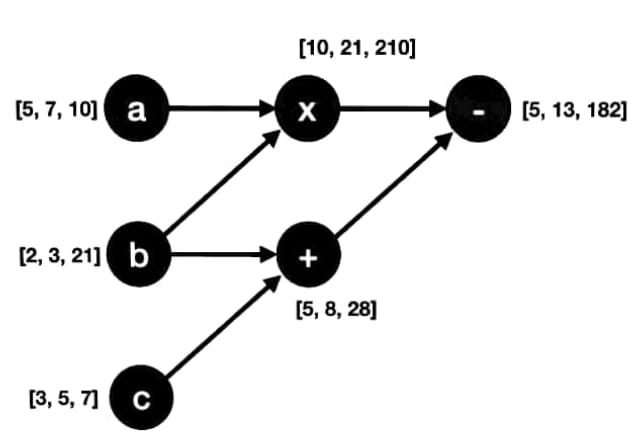
> **multiply: (a*b)**

> **sum: (b+c)**

> **subtract: (multiply — sum)**

# **Broadcasting Effect**

In [1]:
import tensorflow as tf
x=tf.constant([24,56,34])
y=tf.constant([50])
z=tf.constant([50,50,50])
print(tf.multiply(x,y))
print(tf.multiply(x,z))

tf.Tensor([1200 2800 1700], shape=(3,), dtype=int32)
tf.Tensor([1200 2800 1700], shape=(3,), dtype=int32)


> **Hence both the result  is same**

# **Session**
> **A session object encapsulates the environment in which Operations objects are executable and tensor objects are evalued . Its main propose is to evalute graph and output a value**

In [2]:
!pip install tensorflow==1.14..0
import tensorflow as tf

     |████████████████████████████████| 109.3MB 48kB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 3.2MB 30.0MB/s 
     |████████████████████████████████| 491kB 36.5MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [3]:
with tf.compat.v1.Session() as sess:
  x = tf.constant([1,2,3], dtype=tf.float32, name="x")
  print(sess.run(x))
  

[1. 2. 3.]


# **ASSERT**

> **Python has built-in assert statement to use assertion condition in the program. assert statement has a condition or expression which is supposed to be always true. If the condition is false assert halts the program and gives an AssertionError.**

In [5]:
obj=tf.constant(89)
tf.compat.v1.disable_eager_execution()
assert obj.graph is tf.compat.v1.get_default_graph()
obj

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
g=tf.Graph()
with g.as_default():
  obj=tf.constant(89)
  assert obj.graph is g
  print(obj)

Tensor("Const:0", shape=(), dtype=int32)


# **Adding two variables over Graph**

In [7]:
a=90
b=89
c=tf.add(a,b,name='ADD')
print(c)

Tensor("ADD:0", shape=(), dtype=int32)


In [8]:
sess=tf.compat.v1.Session()
print(sess.run(c))

179


# 3D Matrix Operations
> **3d martix is a collection of 2d matrices with the order of (p,q,r)**
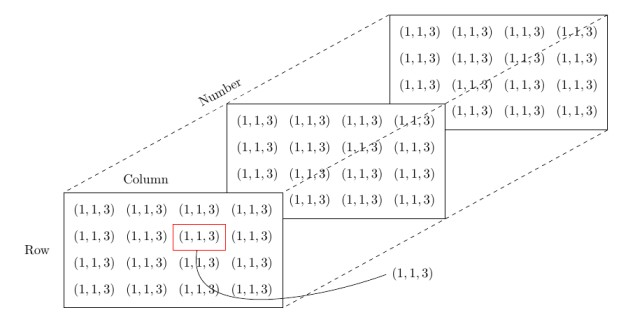

In [9]:
import numpy as np
np.random.randint(0,10,size=(5,3,2))

array([[[8, 2],
        [4, 8],
        [8, 4]],

       [[5, 9],
        [3, 3],
        [7, 4]],

       [[1, 5],
        [9, 7],
        [8, 1]],

       [[4, 9],
        [6, 9],
        [2, 9]],

       [[8, 9],
        [5, 1],
        [5, 7]]])

**Matmul( ) function takes matrix of rank >=2 . Get_collection( ) function always return an array that has been added to it.**

In [10]:
tf.compat.v1.reset_default_graph()
m1=tf.compat.v1.get_variable('m1',shape=(5,3,2))
m2=tf.compat.v1.get_variable('m2',shape=(5,2,4))
m3=tf.matmul(m1,m2,name='m3')
print(m3)
assert m3.shape == (5,3,4)
print(tf.compat.v1.add_to_collection('my_collection',m3))
assert m3 is tf.compat.v1.get_collection('my_collection')[0]

Tensor("m3:0", shape=(5, 3, 4), dtype=float32)
None


In [13]:
default_graph = tf.compat.v1.get_default_graph()
assert m1.graph is default_graph
assert m2.graph is default_graph
assert m3.graph is default_graph
assert m3 is default_graph.get_collection('my_collection')[0]
print ('The Assertion Passed')

The Assertion Passed


In [14]:
print(default_graph)

  

# **Operations over default_graph**

In [21]:
from pprint import pprint
pprint(default_graph.get_operations())

[<tf.Operation 'm1/Initializer/random_uniform/shape' type=Const>,
 <tf.Operation 'm1/Initializer/random_uniform/min' type=Const>,
 <tf.Operation 'm1/Initializer/random_uniform/max' type=Const>,
 <tf.Operation 'm1/Initializer/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'm1/Initializer/random_uniform/sub' type=Sub>,
 <tf.Operation 'm1/Initializer/random_uniform/mul' type=Mul>,
 <tf.Operation 'm1/Initializer/random_uniform' type=Add>,
 <tf.Operation 'm1' type=VarHandleOp>,
 <tf.Operation 'm1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'm1/Assign' type=AssignVariableOp>,
 <tf.Operation 'm1/Read/ReadVariableOp' type=ReadVariableOp>,
 <tf.Operation 'm2/Initializer/random_uniform/shape' type=Const>,
 <tf.Operation 'm2/Initializer/random_uniform/min' type=Const>,
 <tf.Operation 'm2/Initializer/random_uniform/max' type=Const>,
 <tf.Operation 'm2/Initializer/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'm2/Initializer/rand

In [22]:
pprint(default_graph.get_all_collection_keys())

['trainable_variables', 'variables', 'my_collection']


In [24]:
pprint(default_graph.get_tensor_by_name('m1:0'))

<tf.Tensor 'm1:0' shape=() dtype=resource>


In [25]:
pprint(default_graph.get_operation_by_name('m3'))

<tf.Operation 'm3' type=BatchMatMulV2>


# **Multiple Graphs**




In [27]:
try:
  m1=tf.compat.v1.get_variable('m1',shape=(5,3,2))
except:
  print('ValueError')  

ValueError


In [30]:
g=tf.compat.v1.Graph()
with g.as_default():
  m1=tf.compat.v1.get_variable('m1',shape=(5,3,2))
  assert m1.graph is g
  assert m1.graph is not default_graph
  print("Successful")
  print(m1)

Successful
<tf.Variable 'm1:0' shape=(5, 3, 2) dtype=float32>


In [34]:
with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  out=sess.run(m3)
  pprint('Output is numpy array with shape {}:'.format(out.shape))
  pprint(out)

'Output is numpy array with shape (5, 3, 4):'
array([[[-0.07393464,  0.03520208,  0.08141472, -0.22370854],
        [-0.04984038, -0.04939279,  0.05464474,  0.03878722],
        [-0.09286003, -0.0528451 ,  0.10193884, -0.02932161]],

       [[-0.04815206,  0.15374173,  0.00634812,  0.00704692],
        [-0.03400528,  0.15951663, -0.00733029,  0.02900397],
        [ 0.0177633 , -0.16456024,  0.02266664, -0.05346467]],

       [[ 0.01999894,  0.17759924, -0.03075166,  0.03035677],
        [-0.00617251, -0.11457556,  0.00063141,  0.04043617],
        [-0.00379082, -0.03682251,  0.00536077, -0.00312194]],

       [[ 0.04391786,  0.0380612 ,  0.1904141 ,  0.10506617],
        [-0.02445849,  0.01369618, -0.06595599, -0.02283465],
        [-0.04221573, -0.02956731, -0.1749704 , -0.09381742]],

       [[-0.127259  , -0.10901938, -0.01655341, -0.03985224],
        [ 0.0570959 ,  0.02746605,  0.02011862, -0.00661523],
        [-0.08311391, -0.05797973, -0.01863564, -0.01092651]]],
      dtype=fl